<a href="https://colab.research.google.com/github/Raul290697/TAREA1PROGRA/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese el número de líneas de atención (servidores): 25

Simulación con 25 servidores:
Tiempo total de simulación: 695107.05 minutos
Número total de clientes atendidos: 347421
Tiempo máximo de espera - Clientes Premier: 11.70 minutos
Tiempo promedio de espera - Clientes Premier: 0.08 minutos
Tiempo máximo de espera - Clientes Normales: 27.85 minutos
Tiempo promedio de espera - Clientes Normales: 0.17 minutos
Longitud máxima de la cola Premier: 3
Longitud promedio de la cola Premier: 0.23
Longitud máxima de la cola Normal: 10
Longitud promedio de la cola Normal: 1.70
Utilización promedio de los servidores: 81.51%


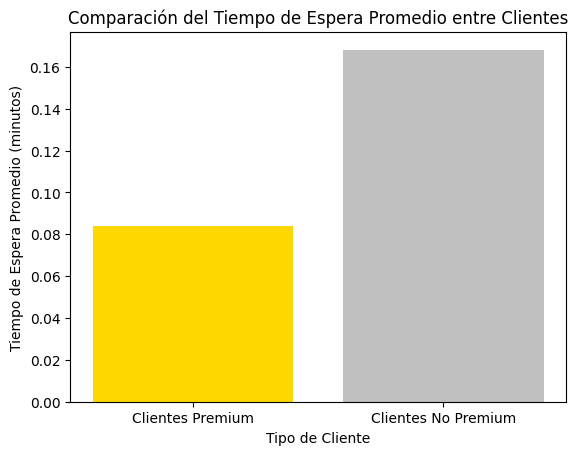

In [1]:
#MARTÍNEZ GARDUÑO REGINA Y UGARTE IGLESIAS JOSHUA RAUL
import heapq  # Para manejar una lista que siempre da el valor más pequeño primero, como una fila de espera.
import random  # Para generar números aleatorios, útil para crear clientes con tiempos diferentes.
from collections import Counter  # Para contar cosas, como cuántos clientes fueron atendidos por cada servidor.
import matplotlib.pyplot as plt  # Para crear gráficos que nos ayuden a visualizar los resultados.

# Definir la clase Persona para representar a un cliente
class Persona:
    def __init__(self, h_llegada, h_atencion=None, h_salida=None, tipo=0):
        # Cada cliente tiene una hora de llegada, una hora en la que es atendido, y una hora de salida.
        # Además, tiene un tipo: 0 para cliente normal y 1 para cliente premier (los clientes importantes).
        self.h_llegada = h_llegada  # Hora en que llega el cliente.
        self.h_atencion = h_atencion  # Hora en que empieza a ser atendido (inicialmente no se sabe).
        self.h_salida = h_salida  # Hora en que se va después de ser atendido.
        self.tipo_de_cliente = tipo  # El tipo de cliente, normal o premier.

    def __str__(self):
        # Esto convierte la información del cliente en texto bonito y fácil de leer.
        cadena = ''
        cadena += 'Hora de llegada: ' + str(self.h_llegada) + ' mins,\n'
        cadena += 'Hora de atención: ' + str(self.h_atencion) + ' mins,\n'
        cadena += 'Hora de salida: ' + str(self.h_salida) + ' mins,\n'
        cadena += 'Tipo de cliente: ' + ('Premier' if self.tipo_de_cliente == 1 else 'Normal') + '\n'
        return cadena

# Definir la clase Evento para manejar los eventos de la simulación (cuando alguien llega o se va)
class Evento:
    def __init__(self, tiempo, tipo_evento, persona=None):
        # Cada evento tiene un tiempo, un tipo (llegada o salida) y puede estar relacionado con un cliente.
        self.tiempo = tiempo  # Cuándo pasa el evento (minutos desde que comenzó la simulación).
        self.tipo_evento = tipo_evento  # Tipo de evento: 'llegada' o 'salida'.
        self.persona = persona  # El cliente involucrado en el evento (puede ser None si es solo el tiempo de llegada).

    def __lt__(self, otro):
        # Esto es para que los eventos se puedan comparar y saber cuál ocurre primero (basado en el tiempo).
        return self.tiempo < otro.tiempo  # El evento que ocurre más temprano va primero.

# Función para liberar un servidor cuando un cliente se va
def liberar_servidor(servidores, persona):
    # Esta función busca qué servidor estaba atendiendo a un cliente y lo libera (ya que el cliente se fue).
    for i in range(len(servidores)):
        if servidores[i] == persona:  # Encontramos al servidor que estaba con este cliente.
            servidores[i] = None  # Liberamos el servidor para que pueda atender a otro cliente.
            return i  # Retornamos el número del servidor que quedó libre.
    return -1  # Si no encontramos al servidor, devolvemos -1 (esto no debería pasar normalmente).

# Función principal para simular el sistema con varios servidores
def simulacion(numero_servidores, config):
    # Inicializamos una lista para representar los servidores, todos empiezan vacíos (None).
    servidores = [None] * numero_servidores
    # Inicializamos una lista de eventos, como la lista de cosas que ocurrirán (llegadas y salidas).
    eventos = []
    # Dos listas para las colas de espera: una para clientes premier y otra para clientes normales.
    cola_premier = []
    cola_no_premier = []

    # Estas listas guardarán cuánto tiempo esperaron los clientes y otras métricas.
    tiempos_espera_premier = []
    tiempos_espera_no_premier = []
    longitud_cola_premier = []
    longitud_cola_no_premier = []
    tiempo_ocupado_servidores = Counter()  # Para contar cuánto tiempo estuvo ocupado cada servidor.

    tiempo_actual = 0  # Al inicio, el tiempo es 0.

    # Programamos el primer evento de llegada.
    interarribo = random.uniform(config['interarribo_min'], config['interarribo_max'])  # Tiempo hasta el próximo cliente.
    tiempo_llegada = tiempo_actual + interarribo  # Calculamos a qué hora llegará el primer cliente.
    tipo_cliente = 1 if random.random() < config['prob_premier'] else 0  # Determinamos si es premier o normal.
    persona = Persona(tiempo_llegada, tipo=tipo_cliente)  # Creamos a la persona (el cliente).
    evento_llegada = Evento(persona.h_llegada, 'llegada', persona)  # Creamos el evento de llegada.
    heapq.heappush(eventos, evento_llegada)  # Lo metemos en nuestra lista de eventos ordenada.

    try:
        while True:  # Bucle infinito hasta que paremos la simulación manualmente.
            if not eventos:  # Si ya no hay eventos, generamos otro evento de llegada.
                interarribo = random.uniform(config['interarribo_min'], config['interarribo_max'])
                tiempo_llegada = tiempo_actual + interarribo
                tipo_cliente = 1 if random.random() < config['prob_premier'] else 0
                persona = Persona(tiempo_llegada, tipo=tipo_cliente)
                evento_llegada = Evento(persona.h_llegada, 'llegada', persona)
                heapq.heappush(eventos, evento_llegada)

            evento = heapq.heappop(eventos)  # Tomamos el siguiente evento (el que ocurre primero).
            tiempo_actual = evento.tiempo  # Actualizamos el tiempo actual a la hora del evento.

            if evento.tipo_evento == 'llegada':  # Si el evento es una llegada:
                persona = evento.persona  # El cliente que acaba de llegar.

                # Programar el próximo evento de llegada.
                interarribo = random.uniform(config['interarribo_min'], config['interarribo_max'])
                tiempo_llegada = tiempo_actual + interarribo
                tipo_cliente = 1 if random.random() < config['prob_premier'] else 0
                nueva_persona = Persona(tiempo_llegada, tipo=tipo_cliente)
                nuevo_evento_llegada = Evento(nueva_persona.h_llegada, 'llegada', nueva_persona)
                heapq.heappush(eventos, nuevo_evento_llegada)

                # Buscar si hay un servidor libre para atender al cliente.
                servidor_libre = next((i for i, s in enumerate(servidores) if s is None), -1)
                if servidor_libre != -1:
                    # Si hay un servidor libre, el cliente es atendido inmediatamente.
                    persona.h_atencion = tiempo_actual  # La hora en que comienza a ser atendido.
                    tiempo_servicio = random.uniform(config['tiempo_minimo_servicio'], config['tiempo_maximo_servicio'])
                    persona.h_salida = tiempo_actual + tiempo_servicio  # Calculamos la hora de salida.
                    servidores[servidor_libre] = persona  # Asignamos al cliente al servidor.
                    tiempo_ocupado_servidores[servidor_libre] += tiempo_servicio  # Sumamos el tiempo que estará ocupado.
                    evento_salida = Evento(persona.h_salida, 'salida', persona)  # Creamos el evento de salida.
                    heapq.heappush(eventos, evento_salida)  # Lo añadimos a los eventos.
                    # Calculamos cuánto tiempo esperó el cliente antes de ser atendido.
                    tiempo_espera = persona.h_atencion - persona.h_llegada
                    if persona.tipo_de_cliente == 1:
                        tiempos_espera_premier.append(tiempo_espera)
                    else:
                        tiempos_espera_no_premier.append(tiempo_espera)
                else:
                    # Si no hay servidores libres, el cliente debe esperar en su cola.
                    if persona.tipo_de_cliente == 1:
                        cola_premier.append(persona)
                    else:
                        cola_no_premier.append(persona)
                    longitud_cola_premier.append(len(cola_premier))
                    longitud_cola_no_premier.append(len(cola_no_premier))

            elif evento.tipo_evento == 'salida':  # Si el evento es una salida:
                persona = evento.persona  # El cliente que se va.
                servidor_libre = liberar_servidor(servidores, persona)  # Liberamos el servidor.
                cliente_atendido = None
                # Atendemos al siguiente cliente, dando prioridad a los clientes premier.
                if cola_premier:
                    cliente_atendido = cola_premier.pop(0)
                elif cola_no_premier:
                    cliente_atendido = cola_no_premier.pop(0)
                if cliente_atendido:
                    # El cliente que estaba esperando ahora será atendido.
                    cliente_atendido.h_atencion = tiempo_actual
                    tiempo_servicio = random.uniform(config['tiempo_minimo_servicio'], config['tiempo_maximo_servicio'])
                    cliente_atendido.h_salida = tiempo_actual + tiempo_servicio
                    servidores[servidor_libre] = cliente_atendido
                    tiempo_ocupado_servidores[servidor_libre] += tiempo_servicio
                    evento_salida = Evento(cliente_atendido.h_salida, 'salida', cliente_atendido)
                    heapq.heappush(eventos, evento_salida)
                    # Calculamos cuánto tiempo esperó el cliente.
                    tiempo_espera = cliente_atendido.h_atencion - cliente_atendido.h_llegada
                    if cliente_atendido.tipo_de_cliente == 1:
                        tiempos_espera_premier.append(tiempo_espera)
                    else:
                        tiempos_espera_no_premier.append(tiempo_espera)

    except KeyboardInterrupt:
        # Si detenemos la simulación manualmente, aquí calculamos los resultados finales.
        tiempo_total = tiempo_actual

        # Calculamos estadísticas como el tiempo máximo y promedio de espera de los clientes premier y normales.
        if tiempos_espera_premier:
            tiempo_max_espera_premier = max(tiempos_espera_premier)
            tiempo_prom_espera_premier = sum(tiempos_espera_premier) / len(tiempos_espera_premier)
        else:
            tiempo_max_espera_premier = 0
            tiempo_prom_espera_premier = 0

        if tiempos_espera_no_premier:
            tiempo_max_espera_no_premier = max(tiempos_espera_no_premier)
            tiempo_prom_espera_no_premier = sum(tiempos_espera_no_premier) / len(tiempos_espera_no_premier)
        else:
            tiempo_max_espera_no_premier = 0
            tiempo_prom_espera_no_premier = 0

        longitud_max_cola_premier = max(longitud_cola_premier) if longitud_cola_premier else 0
        longitud_prom_cola_premier = sum(longitud_cola_premier) / len(longitud_cola_premier) if longitud_cola_premier else 0

        longitud_max_cola_no_premier = max(longitud_cola_no_premier) if longitud_cola_no_premier else 0
        longitud_prom_cola_no_premier = sum(longitud_cola_no_premier) / len(longitud_cola_no_premier) if longitud_cola_no_premier else 0

        utilizacion_servidores = [(tiempo_ocupado / tiempo_total) * 100 for tiempo_ocupado in tiempo_ocupado_servidores.values()]
        utilizacion_promedio = sum(utilizacion_servidores) / numero_servidores if numero_servidores > 0 else 0

        # Mostramos los resultados de la simulación.
        print(f"\nSimulación con {numero_servidores} servidores:")
        print(f"Tiempo total de simulación: {tiempo_total:.2f} minutos")
        print(f"Número total de clientes atendidos: {len(tiempos_espera_premier) + len(tiempos_espera_no_premier)}")
        print(f"Tiempo máximo de espera - Clientes Premier: {tiempo_max_espera_premier:.2f} minutos")
        print(f"Tiempo promedio de espera - Clientes Premier: {tiempo_prom_espera_premier:.2f} minutos")
        print(f"Tiempo máximo de espera - Clientes Normales: {tiempo_max_espera_no_premier:.2f} minutos")
        print(f"Tiempo promedio de espera - Clientes Normales: {tiempo_prom_espera_no_premier:.2f} minutos")
        print(f"Longitud máxima de la cola Premier: {longitud_max_cola_premier}")
        print(f"Longitud promedio de la cola Premier: {longitud_prom_cola_premier:.2f}")
        print(f"Longitud máxima de la cola Normal: {longitud_max_cola_no_premier}")
        print(f"Longitud promedio de la cola Normal: {longitud_prom_cola_no_premier:.2f}")
        print(f"Utilización promedio de los servidores: {utilizacion_promedio:.2f}%")

        # Retornar los resultados para graficar.
        return {
            'tiempo_prom_espera_premier': tiempo_prom_espera_premier,
            'tiempo_prom_espera_no_premier': tiempo_prom_espera_no_premier
        }

# Punto de entrada principal del programa
if __name__ == "__main__":
    # Configuración de la simulación.
    config = {
        'prob_premier': 0.17,  # Probabilidad de que un cliente sea Premier (17% de los clientes serán Premier).
        'tiempo_servicio_premier': 5,  # Tiempo que toma atender a un cliente Premier (en minutos).
        'tiempo_servicio_normal': 30,  # Tiempo que toma atender a un cliente normal.
        'tiempo_maximo_servicio': 81,  # Definimos el tope máximo de tiempo de servicio de línea.
        'tiempo_minimo_servicio': 0.5,  # Definimos el tope mínimo de servicio de línea.
        'interarribo_min': 1,  # Tiempo mínimo entre llegadas de clientes.
        'interarribo_max': 3   # Tiempo máximo entre llegadas de clientes.
    }

    # Pedir al usuario que ingrese el número de servidores.
    numero_servidores = int(input("Ingrese el número de líneas de atención (servidores): "))

    # Ejecutar la simulación con el número de servidores especificado.
    resultados = simulacion(numero_servidores, config)

    # Ahora, graficar y comparar el tiempo de espera promedio entre clientes premium y no premium.
    categorias = ['Clientes Premium', 'Clientes No Premium']
    tiempos_espera = [resultados['tiempo_prom_espera_premier'], resultados['tiempo_prom_espera_no_premier']]

    # Crear el gráfico de barras.
    plt.bar(categorias, tiempos_espera, color=['gold', 'silver'])
    plt.xlabel('Tipo de Cliente')
    plt.ylabel('Tiempo de Espera Promedio (minutos)')
    plt.title('Comparación del Tiempo de Espera Promedio entre Clientes')
    plt.show()
